# QTW - Assignment 5 - Working with Missing Data

**Utilizing the California Housing dataset**

In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sn


from pandas.plotting import scatter_matrix 


In [2]:
# Load in the dataset
california = datasets.fetch_california_housing()
print(california.data.shape)

(20640, 8)


In [3]:
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# Convert the matrix to pandas
cal = pd.DataFrame(california.data)
cal.columns = california.feature_names
cal['MedInc'] = california.target
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

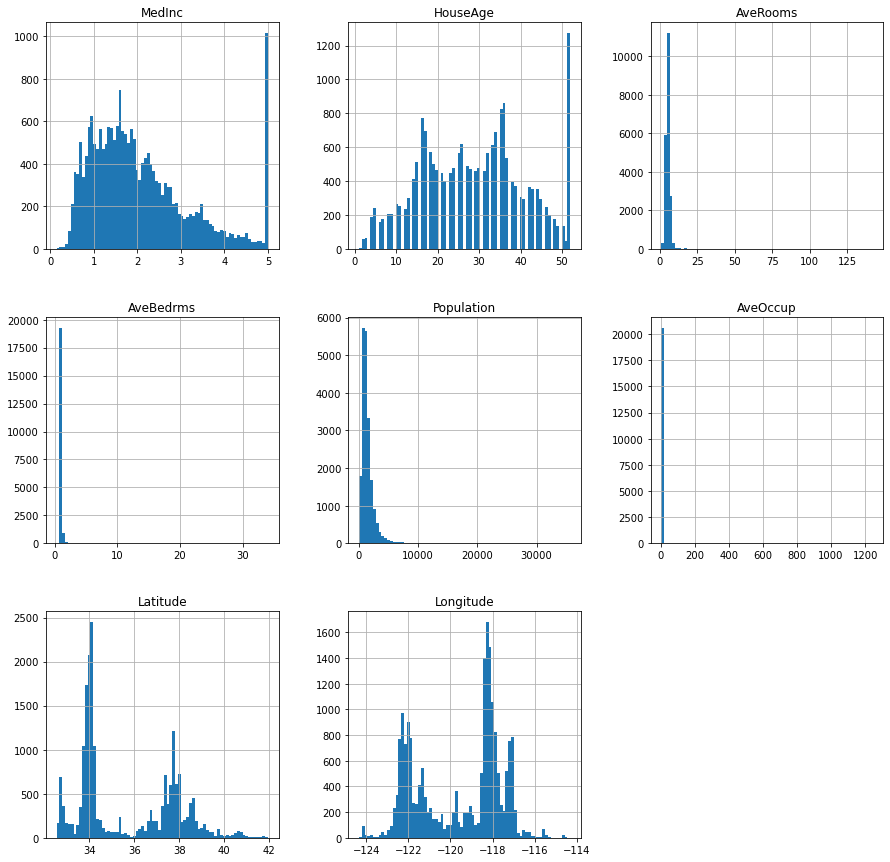

In [9]:
cal.hist(bins=75, figsize=(15,15))


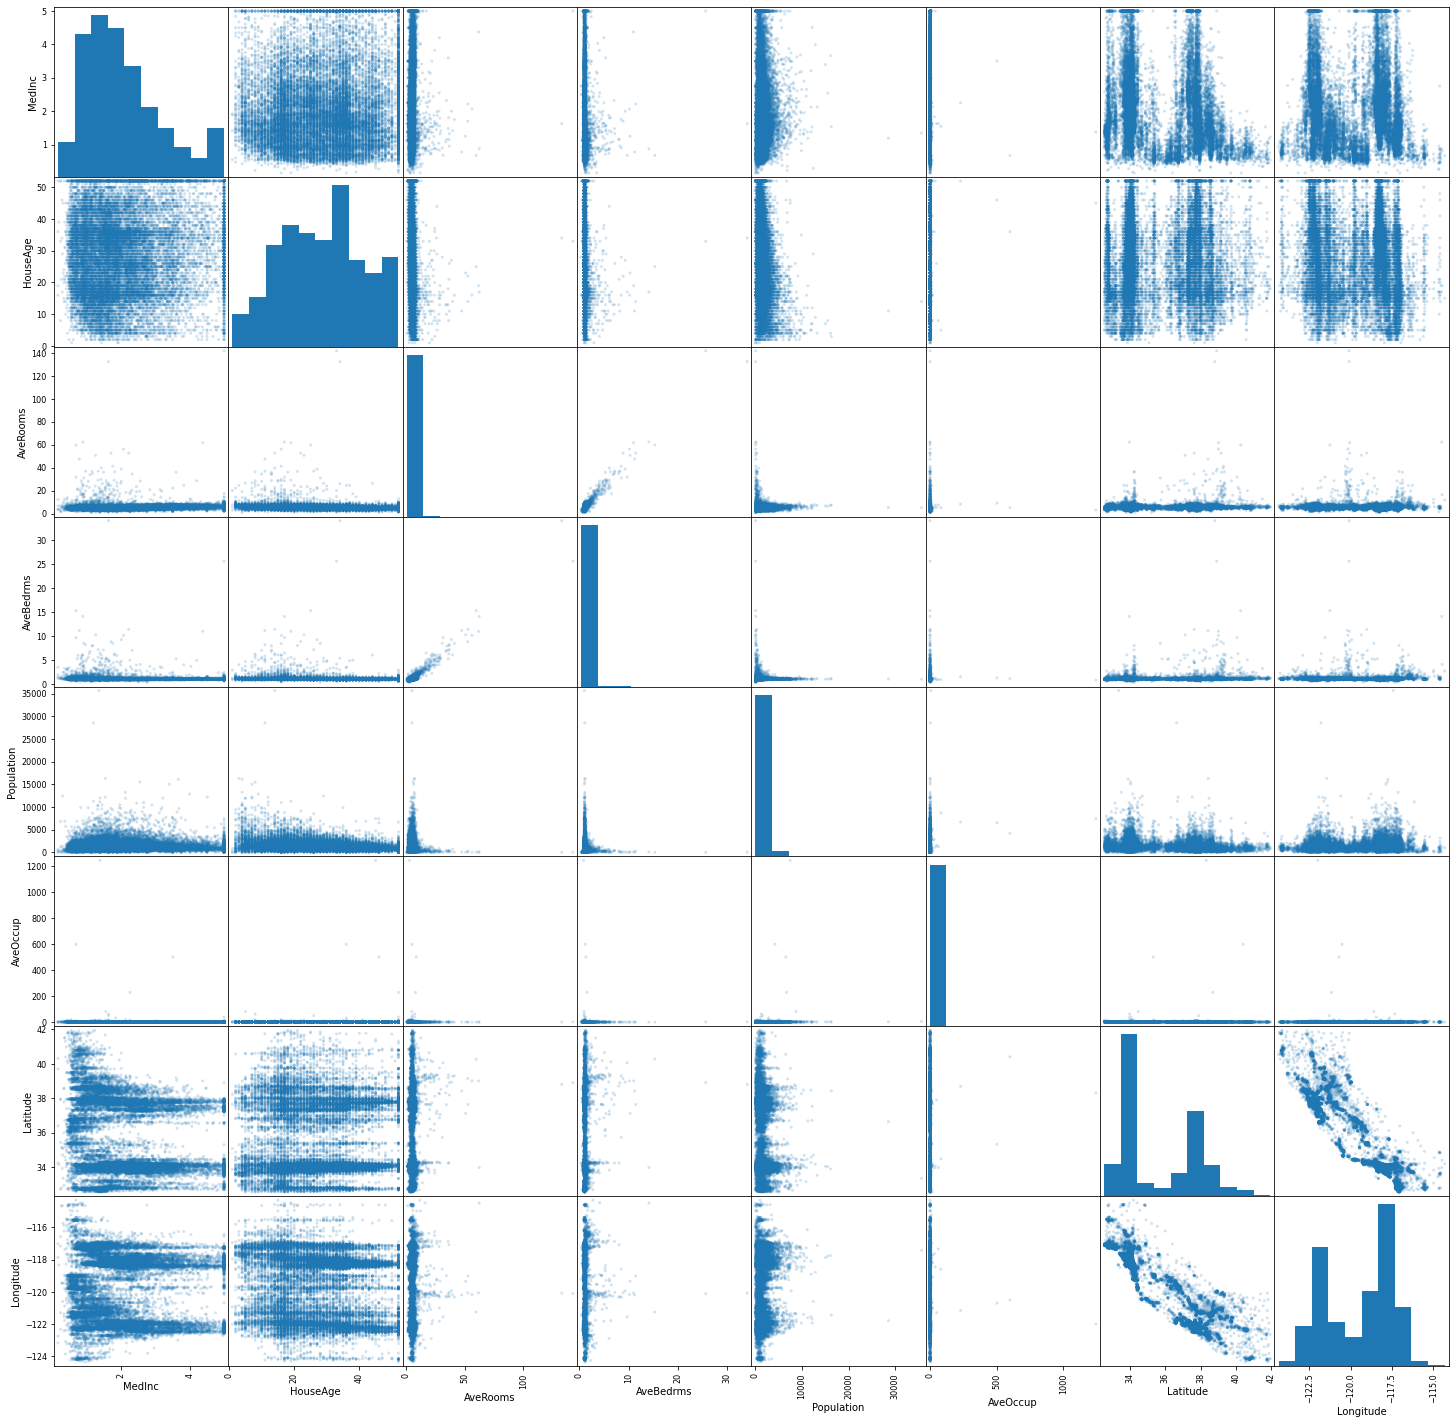

In [10]:
scatter_matrix(cal, alpha=0.2, figsize=(25, 25))
plt.show()

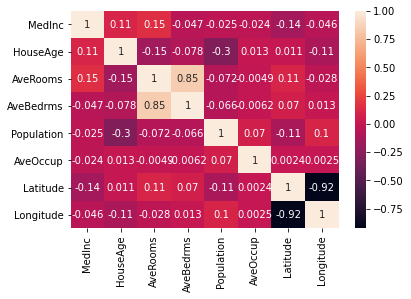

In [11]:
corrMatrix = cal.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
cal.corr()['MedInc'].sort_values(ascending=False)

MedInc        1.000000
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedInc, dtype: float64

In [13]:
def get_train_test_matrix(train_set,test_set):
    # Converting the training and testing datasets back to matrix-formats
    X_train = train_set.iloc[:, 1:].values # returns the data; excluding the target
    Y_train = train_set.iloc[:, 0].values # returns the target-only
    X_test = test_set.iloc[:, 1:].values # ""
    Y_test = test_set.iloc[:, 0].values # ""
    return X_train,Y_train,X_test,Y_test

In [14]:
def get_train_test_split(inputDF,split_fraction=0.7):
    # Create training and testing sets (cross-validation not needed)
    train_set = inputDF.sample(frac=split_fraction, random_state=100)
    test_set = inputDF[~inputDF.isin(train_set)].dropna()
    print(train_set.shape[0])
    print(test_set.shape[0])
    return train_set,test_set

In [15]:
def get_row_indices(train_set,test_set):
    # Get the training and testing row indices for later use
    train_index = train_set.index.values.astype(int)
    test_index = test_set.index.values.astype(int)
    return train_index,test_index

In [16]:
def get_LR_model(X_train,Y_train):
    # Fit a linear regression to the training data
    reg = LinearRegression(normalize=True).fit(X_train, Y_train)
    print("Regression Score : ",reg.score(X_train, Y_train)) #Return the coefficient of determination R^2 of the prediction.
    print("Estimated coefficients of regression : ",reg.coef_)
    print("Regression intercept : ",reg.intercept_)
    print("Parameters for the esitmator : ",reg.get_params())
    return reg

In [17]:
def print_model_params(reg,df):
    # Find the variable with the largest "normalized" coefficient value
    print('The positive(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
    #print('The abs(max) coef-value is {}'.format(max(reg.coef_, key=abs))) # ABS Max
    max_var = max(reg.coef_) # Positive Max
    #max_var = max(reg.coef_, key=abs) # ABS Max
    var_index = reg.coef_.tolist().index(max_var)
    print("Column Names : ",df.columns)
    print('The variable associated with this coef-value is {}'.format(df.columns[var_index+1]))
    

In [18]:
def get_all_error_calc(model,X_test,Y_test):
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    print("MAE: %.3f"%mae)
    print("MSE:  %.3f"%mse)
    print("RMSE:  %.3f"%rmse_val)
    print("R2:  %.3f"%r2)
    return mae,mse,rmse_val,r2

In [210]:
def run_all_model(imputed_df_dict,df):
    ## Get the dictionay with imputed df (Imputing HouseAge with median)
    model_result = {}
    for k in imputed_df_dict:
        imputed_df = imputed_df_dict[k]
        result= {}
        keyVal=["",0]
        if k==0.0:
            train_set,test_set = get_train_test_split(imputed_df)
            train_index,test_index = get_row_indices(train_set,test_set)
        else:
            train_set = imputed_df.iloc[train_index]
            test_set = imputed_df.iloc[test_index]
            keyVal = k.split("-")
        print("Handling data with {}% imputation".format(int(float(keyVal[1])*100)))
        X_train,Y_train,X_test,Y_test = get_train_test_matrix(train_set,test_set)
        model = get_LR_model(X_train,Y_train)
        print_model_params(model,df)
        mae,mse,rmse_val,r2 = get_all_error_calc(model,X_test,Y_test)
        result["mae"]=mae
        result["mse"]=mse
        result["rmse_val"]=rmse_val
        result["r2"]=r2
        model_result[k] = result
    return model_result


In [151]:
def get_model_result_df(model_result):
    cols = ["data","imputation","mae","mse","rmse","r2","mae_diff","mse_diff","rmse_diff","r2_diff"]
    df_index = range(len(model_result))
    result_df = pd.DataFrame(columns=cols, index=df_index)
    indx=0
    base_mae = base_mse = base_rmse_val = base_r2 = mae_diff = mse_diff = rmse_diff = r2_diff = 0
    for k in model_result:
        result = model_result[k]
        mae = result["mae"]
        mse = result["mse"]
        rmse_val = result["rmse_val"]
        r2 = result["r2"]
        data = imputation=""
        keyVal=["",0]
        if k==0.0:
            data = "original"
            imputation="none"
            base_mae = mae
            base_mse=mse
            base_rmse_val=rmse_val
            base_r2=r2
            mae_diff = np.nan
            mse_diff = np.nan
            rmse_diff = np.nan
            r2_diff = np.nan
        else:
            keyVal = k.split("-")
            data= str(int(float(keyVal[1])*100))+"%"
            imputation=keyVal[0]
            mae_diff = mae-base_mae
            mse_diff = mse-base_mse
            rmse_diff = rmse_val-base_rmse_val
            r2_diff = r2-base_r2
        result_df.loc[indx].data = data
        result_df.loc[indx].imputation = imputation
        result_df.loc[indx].mae = mae
        result_df.loc[indx].mse = mse
        result_df.loc[indx].rmse = rmse_val
        result_df.loc[indx].r2 = r2    
        result_df.loc[indx].mae_diff = round(mae_diff,4)
        result_df.loc[indx].mse_diff = round(mse_diff,4)
        result_df.loc[indx].rmse_diff = round(rmse_diff,4)
        result_df.loc[indx].r2_diff = round(r2_diff,4)
        indx=indx+1        
    return result_df
    

In [215]:
#case 1 - Missing completely at Random
def get_mcar_imputed_df(impute_fractions,housing_df,impute_variable,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            in_sample = housing_df.sample(frac=percent, random_state=99)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un imputed sample shape : {}".format(out_sample.shape))
            print("Mean",np.mean(housing_df[impute_variable]))
            print("Median",np.median(housing_df[impute_variable]))
            print("Std.Dev",statistics.stdev(housing_df[impute_variable]))            
            
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            print("Imputed value ",fill_value)
            imputed_data = pd.concat([in_sample, out_sample])
            
            print("Mean",np.mean(imputed_data[impute_variable]))
            print("Median",np.median(imputed_data[impute_variable]))
            print("Std.Dev",statistics.stdev(imputed_data[impute_variable]))  
            
            imputed_data = imputed_data.sort_index()
            imputed_df["mcar-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [226]:
#Evaluating Case 1 - MIssing completely at random
mcar_impute_fraction_list = [0.0,0.01,0.05,0.1,0.2,0.33,0.5]
cols = cal.columns[1:]
#imputed_df_dict = {}
results = pd.DataFrame()
for c in cols:
    imputed_df_dict = get_mcar_imputed_df(mcar_impute_fraction_list,cal,c,"median")
    model_result = run_all_model(imputed_df_dict,cal)
    model_result_df = get_model_result_df(model_result)  
    model_result_df['columnName'] = c
    results = results.append(model_result_df)
display(results)

#todo - add coeeff for each var


Percentage Imputed : 0%
Percentage Imputed : 1%
Imputed sample shape : (206, 8)
Un imputed sample shape : (20434, 8)
Mean 28.639486434108527
Median 29.0
Std.Dev 12.585557612111648
Imputed value  29.0
Mean 28.638178294573642
Median 29.0
Std.Dev 12.518553342725133
Percentage Imputed : 5%
Imputed sample shape : (1032, 8)
Un imputed sample shape : (19608, 8)
Mean 28.639486434108527
Median 29.0
Std.Dev 12.585557612111648
Imputed value  29.0
Mean 28.663468992248063
Median 29.0
Std.Dev 12.2772106929607
Percentage Imputed : 10%
Imputed sample shape : (2064, 8)
Un imputed sample shape : (18576, 8)
Mean 28.639486434108527
Median 29.0
Std.Dev 12.585557612111648
Imputed value  29.0
Mean 28.69670542635659
Median 29.0
Std.Dev 11.947446528798753
Percentage Imputed : 20%
Imputed sample shape : (4128, 8)
Un imputed sample shape : (16512, 8)
Mean 28.639486434108527
Median 29.0
Std.Dev 12.585557612111648
Imputed value  29.0
Mean 28.749321705426357
Median 29.0
Std.Dev 11.263703672535463
Percentage Imputed

,data,imputation,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,columnName
0,original,none,0.678033,0.80827,0.899039,0.390038,NaN,NaN,NaN,NaN,HouseAge
1,1%,mcar,0.677987,0.808193,0.898995,0.390096,-0,-0.0001,-0,0.0001,HouseAge
2,5%,mcar,0.677979,0.808118,0.898954,0.390152,-0.0001,-0.0002,-0.0001,0.0001,HouseAge
3,10%,mcar,0.678096,0.808398,0.89911,0.389941,0.0001,0.0001,0.0001,-0.0001,HouseAge
4,20%,mcar,0.678039,0.807903,0.898834,0.390315,0,-0.0004,-0.0002,0.0003,HouseAge
5,33%,mcar,0.677341,0.807995,0.898886,0.390245,-0.0007,-0.0003,-0.0002,0.0002,HouseAge
6,50%,mcar,0.677027,0.807605,0.898668,0.39054,-0.001,-0.0007,-0.0004,0.0005,HouseAge
0,original,none,0.678033,0.80827,0.899039,0.390038,NaN,NaN,NaN,NaN,AveRooms
1,1%,mcar,0.680391,0.81487,0.902701,0.385057,0.0024,0.0066,0.0037,-0.005,AveRooms
2,5%,mcar,0.687385,0.83683,0.914784,0.368485,0.0094,0.0286,0.0157,-0.0216,AveRooms


In [214]:
#Case2 : if z > 30 then impute x - Missing at Random
def get_mar_imputed_df(impute_fractions,housing_df,impute_variable,reference_variable,ref_variable_threshold,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            print("Imputing variable {0} when ever variable {1} is > {2}".format(impute_variable,reference_variable,ref_variable_threshold))
            housing_df_sub = housing_df[housing_df[reference_variable] > ref_variable_threshold]   
            print("Sub dataframe shape where variable {0} is > {1}".format(reference_variable,ref_variable_threshold))
            print(housing_df_sub.shape)
            in_sample = housing_df_sub.sample(frac=percent, random_state=99)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un imputed sample shape : {}".format(out_sample.shape))
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "zero"):
                in_sample[impute_variable] = in_sample[impute_variable].fillna(0)
            imputed_data = pd.concat([in_sample, out_sample])
            imputed_data = imputed_data.sort_index()
            imputed_df["mar-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [227]:
#Evaluating Case 2 - Missing at random
mar_impute_fraction_list = [0.0,0.1,0.2,0.3]
mar_imputed_df_dict = get_mar_imputed_df(mar_impute_fraction_list,cal,'HouseAge','AveBedrms',3,"median")#'AveBedrms','AveRooms',4,
model_result = run_all_model(mar_imputed_df_dict,cal)
model_result_df = get_model_result_df(model_result)  
display(model_result_df)



Percentage Imputed : 0%
Percentage Imputed : 10%
Imputing variable HouseAge when ever variable AveBedrms is > 3
Sub dataframe shape where variable AveBedrms is > 3
(107, 8)
Imputed sample shape : (11, 8)
Un imputed sample shape : (20629, 8)
Percentage Imputed : 20%
Imputing variable HouseAge when ever variable AveBedrms is > 3
Sub dataframe shape where variable AveBedrms is > 3
(107, 8)
Imputed sample shape : (21, 8)
Un imputed sample shape : (20619, 8)
Percentage Imputed : 30%
Imputing variable HouseAge when ever variable AveBedrms is > 3
Sub dataframe shape where variable AveBedrms is > 3
(107, 8)
Imputed sample shape : (32, 8)
Un imputed sample shape : (20608, 8)
14448
6192
Handling data with 0% imputation
Regression Score :  0.4021408992488681
Estimated coefficients of regression :  [ 5.39413657e-03  3.64187452e-01 -1.38129627e+00 -1.17589393e-05
 -1.24751112e-03 -7.30902386e-01 -7.23704703e-01]
Regression intercept :  -59.014861272508455
Parameters for the esitmator :  {'copy_X': 

,data,imputation,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff
0,original,none,0.678033,0.80827,0.899039,0.390038,NaN,NaN,NaN,NaN
1,10%,mar,0.678052,0.808122,0.898956,0.390149,0,-0.0001,-0.0001,0.0001
2,20%,mar,0.678066,0.808072,0.898928,0.390188,0,-0.0002,-0.0001,0.0001
3,30%,mar,0.678068,0.807984,0.898879,0.390254,0,-0.0003,-0.0002,0.0002


In [223]:
#Case 3 : Impute 25 % of x -Missing not at random
def get_mnar_imputed_df(impute_fractions,housing_df,impute_variable,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            var_threshold = np.quantile(housing_df[impute_variable],percent)
            print("Imputing variable {0} when < {1}".format(impute_variable,var_threshold))
            in_sample = housing_df[housing_df[impute_variable] < var_threshold]          
            print(in_sample.shape)
            
            #in_sample = housing_df_sub #housing_df_sub.sample(frac=percent, random_state=99)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un imputed sample shape : {}".format(out_sample.shape))
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "zero"):
                in_sample[impute_variable] = in_sample[impute_variable].fillna(0)
            imputed_data = pd.concat([in_sample, out_sample])
            imputed_data = imputed_data.sort_index()
            imputed_df["mnar-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [228]:
#Evaluating Case 3 - Missing Not at random
mnar_imputed_df_dict = get_mnar_imputed_df([0.0,0.25],cal,'Latitude',"median") #'AveBedrms','AveRooms',4,
model_result = run_all_model(mnar_imputed_df_dict,cal)
model_result_df = get_model_result_df(model_result)  
display(model_result_df)
    


Percentage Imputed : 0%
Percentage Imputed : 25%
Imputing variable Latitude when < 33.93
(5011, 8)
Imputed sample shape : (5011, 8)
Un imputed sample shape : (15629, 8)
14448
6192
Handling data with 0% imputation
Regression Score :  0.4021408992488681
Estimated coefficients of regression :  [ 5.39413657e-03  3.64187452e-01 -1.38129627e+00 -1.17589393e-05
 -1.24751112e-03 -7.30902386e-01 -7.23704703e-01]
Regression intercept :  -59.014861272508455
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.3641874520685189
Column Names :  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
The variable associated with this coef-value is AveRooms
MAE: 0.678
MSE:  0.808
RMSE:  0.899
R2:  0.390
Handling data with 25% imputation
Regression Score :  0.2092011396520359
Estimated coefficients of regression :  [ 1.07988417e-02  3.639

C:\Users\Anand\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Anand\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,data,imputation,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff
0,original,none,0.678033,0.80827,0.899039,0.390038,NaN,NaN,NaN,NaN
1,25%,mnar,0.804116,1.06985,1.03434,0.192635,0.1261,0.2616,0.1353,-0.1974


In [ ]:
results